# Graphs and Graphing Algorithms


1. The Graph Abstract Data Type

2. Breadth-First Search

3. Depth-First Search

4. Shortest Path Problems

5. Minimum Spanning Tree


## 7.1 Introduction

<u>Graphs</u> can be used to represent many interesting things about our world, including systems of roads, airline flights, how the internet is connected, or even the sequence of classes you must take.

We will see in this chapter that once we have a good representation for a problem, we can use some standard graph algorithms to solve what otherwise might seem to be a very difficult problem!

A graph is just like a road map. If you have ever used one of the internet map sites, you know that a computer can find the shortest, quickest, or easiest path from one place to another.

## 7.2. Vocabulary and Definitions

- <u>Vertex</u>: A vertex (also called a **node**) is a fundamental part of a graph. It can have a name, which we will call the **key**. A vertex may also have additional information. We will call this additional information the **value** or the payload.

- <u>Edge</u>: An edge (also called an **arc**) is another fundamental part of a graph. An edge connects two vertices to show that there is a relationship between them. Edges may be one-way or two-way. If the edges in a graph are all one-way, we say that the graph is a <u>directed graph</u>, or a digraph.

- <u>Weight</u>: Edges may be weighted to show that there is a cost to go from one vertex to another, which we call **edge cost**. For example, in a graph of roads that connect one city to another, the weight on the edge might represent the distance between the two cities.

A graph can be represented by $G =(V,E)$. For the graph $G$, $V$ is a set of vertices and $E$ is a set of edges. Each edge is a tuple $(v,w)$ where $v, w \in V$. We can add a third component to the edge tuple to represent a weight. A subgraph $s$ 
 is a set of edges $e$ and vertices $v$ such that $e \subset E$ and $v \subset V$.

<center><img src="imgs/digraph.png" width="33%" /></center>

The above is a simple weighted digraph. Formally we can represent this graph as the set of six vertices:

$$V = \left\{ v_0, v_1, v_2, v_3, v_4, v_5 \right\}$$

and the set of nine edges:

$$\begin{split}E = \left\{ \begin{array}{l}(v_0, v_1, 5), (v_1, v_2, 4), (v_2, v_3, 9), \\
                             (v_3, v_4, 7), (v_4, v_0, 1), (v_0, v_5, 2), \\
                             (v_5, v_4, 8), (v_3, v_5, 3), (v_5, v_2, 1)
             \end{array} \right\}\end{split}$$

The example graph helps illustrate two other key graph terms:

- <u>Path</u>: A path in a graph is a sequence of vertices that are connected by edges. Formally we would define a path as $w_1, w_2, ..., w_n$ such that $(w_i, w_{i+1}) \in E$ for all $1 \le i \le n-1$. The unweighted path length is the number of edges in the path, specifically $n-1$. The weighted path length is the sum of the weights of all the edges in the path. For example, the path from $v_3$ to $v_1$ is the sequence of vertices $(v_3, v_4, v_0, v_1)$.

- <u>Cycle</u>: A cycle in a directed graph is a path that starts and ends at the same vertex. For example, the path $(v_5, v_2, v_3, v_5)$ is a cycle. A graph with no cycles is called an **acyclic graph**. A directed graph with no cycles is called a **directed acyclic graph or a DAG**. We will see that we can solve several important problems if the problem can be represented as a DAG!

A <u>tree</u> is defined as a type of graph that is connected (There is a path between every pair of vertices in the tree) and acyclic. We will explore different tree in detail in next chapter!

## 7.3. The Graph Abstract Data Type

Note that vertices may be either connected to each other or isolated. Edges join two vertices and may be weighted.

- `Graph()`: creates a new empty graph.

- `set_vertex(vert)`: adds an instance of Vertex to the graph.

- `add_edge(from_vert, to_vert)`: adds a new directed edge to the graph that connects two vertices.

- `add_edge(from_vert, to_vert, weight)`: adds a new weighted directed edge to the graph that connects two vertices.

- `get_vertex(vert_key)`: finds the vertex in the graph named `vert_key`.

- `get_vertices()`: returns the list of all vertices in the graph.

- `in`: returns `True` for a statement `vertex in graph` if the given vertex is in the graph, `False` otherwise.

Now that we have looked at the definition for the graph ADT, there are several ways we can implement it. There are two well-known implementations of a graph, the <u>adjacency matrix</u> and the <u>adjacency list</u>. 

## 7.4. An Adjacency Matrix

One of the easiest ways to implement a graph is to use a two-dimensional matrix. Each of the rows and columns represents a vertex in the graph. The value that is stored in the cell at the intersection of row $v$ and column $w$ indicates if there is an edge.

<center><img src="imgs/adjMAT.png" width="30%" /></center>

When two vertices are connected by an edge, we say that they are <u>adjacent</u> and the value in each cell represents the weight. The advantage of the adjacency matrix is that it is simple, and for small graphs it is easy to see which nodes are connected to other nodes. However, we can say that this matrix is **sparse**. A matrix is not a very efficient way to store sparse data. 

The adjacency matrix is thus a good implementation for a graph when the number of edges is large. Since there is one row and one column for every vertex in the graph, the number of edges required to fill the matrix is $|V|^2$.

However, there are few real problems that approach this sort of connectivity. The problems we will look at in this chapter all involve graphs that are sparsely connected!

## 7.5. An Adjacency List

A more space-efficient way to implement a sparsely connected graph is to use an adjacency list. In this implementation, we keep a master list of all the vertices in the `Graph` object, and each vertex object in the graph maintains a list of the other vertices that it is connected to. 

In our implementation of the `Vertex` class we will use a dictionary rather than a list, where the dictionary keys are the vertices and the values are the weights.

The advantage of the adjacency list implementation is that it allows us to compactly represent a sparse graph. The adjacency list also allows us to easily find all the links that are directly connected to a particular vertex!

<center><img src="imgs/adjlist.png" width="40%" /></center>

## 7.6. Implementation

In [ ]:
class Vertex:
    def __init__(self, key):
        self.key = key
        self.neighbors = {}

    def get_neighbor(self, other):
        return self.neighbors.get(other, None)
    def set_neighbor(self, other, weight=0):
        self.neighbors[other] = weight

    def get_neighbors(self):
        return self.neighbors.keys()
    def get_key(self):
        return self.key
    
    def __repr__(self):
        return f"Vertex({self.key})"
    def __str__(self):
        return (str(self.key) + " connected to: " + str([x.key for x in 
                                                         self.neighbors]))

Each `Vertex` uses a dictionary to keep track of the vertices to which it is connected and the weight of each edge. Note that the constructor simply initializes the key, which will typically be a string and the `get_neighbor()` method returns the weight of the edge from this vertex to the vertex passed as a parameter.

In [ ]:
class Graph:
    def __init__(self):
        self.vertices = {}

    def set_vertex(self, key):
        self.vertices[key] = Vertex(key)    
    def add_edge(self, from_vert, to_vert, weight=0):
        if from_vert not in self.vertices:
            self.set_vertex(from_vert)
        if to_vert not in self.vertices:
            self.set_vertex(to_vert)
        self.vertices[from_vert].set_neighbor(self.vertices[to_vert], weight)
        
    def get_vertex(self, key):
        return self.vertices.get(key, None)
    def get_vertices(self):
        return self.vertices.keys()
    
    def __contains__(self, key):
        return key in self.vertices
    def __iter__(self):
        return iter(self.vertices.values())

The `Graph` class, also contains a dictionary that **maps vertex names to vertex objects**. Note that we have implemented the `__iter__` method to make it easy to iterate over all the vertex objects in a particular graph. 

Now let us define the graph that we have seen earlier. First we create six vertices numbered 0 through 5. Then we display the vertex dictionary. Notice that for each key 0 through 5 we have created an instance of a `Vertex`:

In [ ]:
g = Graph()
for i in range(6):
    g.set_vertex(i)

g.vertices

Next, we add the edges that connect the vertices together. Finally, a nested loop verifies that each edge in the graph is properly stored:

In [ ]:
g.add_edge(0, 1, 5)
g.add_edge(0, 5, 2)
g.add_edge(1, 2, 4)
g.add_edge(2, 3, 9)
g.add_edge(3, 4, 7)
g.add_edge(3, 5, 3)
g.add_edge(4, 0, 1)
g.add_edge(5, 4, 8)
g.add_edge(5, 2, 1)

for v in g:
    for w in v.get_neighbors():
        print(f"({v.get_key()}, {w.get_key()}, {v.get_neighbor(w)})")

https://visualgo.net/en/graphds

## 7.7. The Word Ladder Problem

To begin our study of graph algorithms let's consider the following puzzle called a **word ladder**: transform the word FOOL into the word SAGE. In a word ladder puzzle you must make the change occur gradually by changing **one letter** at a time. 

At each step you must transform one word into another word; **you are not allowed to transform a word into a non-word**. The following sequence of words shows one possible solution to the problem posed above:

```
FOOL
POOL
POLL
POLE
PALE
SALE
SAGE
```

There are many variations of the word ladder puzzle. For example you might be given a particular number of steps in which to accomplish the transformation, or you might need to use a particular word. In this section we are interested in figuring out the smallest number of transformations needed to turn the starting word into the ending word.

Here is an outline of where we are going:

- Represent the relationships between the words as a graph.

- Use the graph algorithm known as <u>breadth-first search</u> to find an efficient path from the starting word to the ending word.

## 7.8. Building the Word Ladder Graph

Our first problem is to figure out how to turn a large collection of words into a graph. What we would like is to have an edge from one word to another if the two words are only different by a single letter.

If we can create such a graph, then any path from one word to another is a solution to the word ladder puzzle!

<center><img src="imgs/wordgraph.png" width="55%" /></center>

Let's start with the assumption that we have a list of words that are all the same length. As a starting point, we can create a vertex in the graph for every word in the list.

 To figure out how to connect the words, we could compare each word in the list with every other. When we compare we are looking to see how many letters are different. If the two words in question are different by only one letter, we can create an edge between them in the graph. 

For a small set of words that approach would work fine. However, let's suppose we have a list of [5,110 words](https://wordsrated.com/tools/wordslists/4-letter-words/). Roughly speaking, comparing one word to every other word on the list is an $O(n^2)$ algorithm. For 5,110 words, is more than 26 million comparisons!

We can do much better by assuming that we have a number of buckets, each labeled with a four-letter word, except that one of the letters on the label has been replaced by an underscore. As we process a list of words, we compare each word with each bucket using the underscore `(_)` as a wildcard.

Every time we find a matching bucket we put the word in that bucket, so that both `POPE` and `POPS` would both go into the `POP_` bucket. Once we have all the words in the appropriate buckets, we know that all the words in each bucket must be connected!

<center><img src="imgs/wordbuckets.png" width="35%" /></center>

In [ ]:
import sys
sys.path.append("./pythonds3/")
from pythonds3.graphs import Graph

In [ ]:
def build_graph(words):
    buckets = {}
    the_graph = Graph()
    all_words = words
    # create buckets of words that differ by 1 letter
    for line in all_words:
        word = line.strip()
        for i, _ in enumerate(word):
            bucket = f"{word[:i]}_{word[i + 1 :]}"
            buckets.setdefault(bucket, set()).add(word)

    # add edges between different words in the same bucket
    for similar_words in buckets.values():
        for word1 in similar_words:
            for word2 in similar_words - {word1}:
                the_graph.add_edge(word1, word2)
    return the_graph

We can implement the scheme we have just described by using a dictionary. The labels on the buckets we have just described are the keys in our dictionary. The value stored for each key is a list of words.

Since this is our first real-world graph problem, you might be wondering how sparse the graph is. The list of four-letter words we have for this problem is 5,110 words long. If we were to use an adjacency matrix, the matrix would have 
 $5,110 \cdot 5,110= 26,112,100$ cells. The graph constructed by the `build_graph()` function has exactly 53,286 edges, so the matrix would have only 0.20% of the cells filled! That is a very sparse matrix indeed.

## 7.9. Implementing Breadth-First Search

With the graph constructed we can now turn our attention to the algorithm we will use to find the shortest solution to the word ladder problem. The graph algorithm we are going to use is called the <u>breadth-first search (BFS)</u>, and it is one of the easiest algorithms for searching a graph!

Given a starting vertex $s$ of a graph, a breadth first search proceeds by exploring edges in the graph to find all the vertices in $G$ for which there is a path from $s$. 

The remarkable thing about a breadth-first search is that it finds all the vertices that are a distance $k$ from $s$ before it finds any vertices that are a distance $k+1$. 

To keep track of its progress, BFS colors each of the vertices white, gray, or black. All the vertices are initialized to white when they are constructed. A white vertex is an undiscovered vertex. When a vertex is initially discovered it is colored gray, and when BFS has completely explored a vertex it is colored black.

This means that once a vertex is colored black, it has no white vertices adjacent to it. A gray node, on the other hand, may have some white vertices adjacent to it, indicating that there are still additional vertices to explore.

The `bfs()` shown below uses the adjacency list graph representation we developed earlier. In addition it uses a `Queue`, a crucial point as we will see, to decide which vertex to explore next.

In [ ]:
from pythonds3.basic import Queue
from pythonds3.graphs import Graph # This is the extended version


def bfs(start):
    start.distance = 0
    start.previous = None
    vert_queue = Queue()
    vert_queue.enqueue(start)
    while vert_queue.size() > 0:
        current = vert_queue.dequeue()
        for neighbor in current.get_neighbors():
            if neighbor.color == "white":
                neighbor.color = "gray"
                neighbor.distance = current.distance + 1
                neighbor.previous = current
                vert_queue.enqueue(neighbor)
        current.color = "black"

The BFS algorithm uses an extended version of the `Vertex` class that adds three new instance variables: `distance`, `previous`, and `color`. Each of these instance variables also has the appropriate getter and setter methods. 

BFS begins at the starting vertex `start` and paints it gray. Two other values, the `distance` and the `previous`, are initialized to 0 and `None` respectively. Finally, `start` is placed on a `Queue`. The next step is to begin to systematically explore vertices at the front of the queue. We explore each new node at the front of the queue by iterating over its adjacency list.

As each node on the adjacency list is examined, its color is checked. If it is white four things happen:

1. The new unexplored vertex `neighbor` is colored gray.

2. The predecessor of `neighbor` is set to the current node `current`.

3. The distance to `neighbor` is set to the distance to `current + 1`.

4. `neighbor` is added to the end of a queue. This effectively schedules this node for further exploration, but not until all the other vertices on the adjacency list of current have been explored!

<center><img src="imgs/bfs1.png" width="35%" /></center>

Starting from `FOOL` we take all nodes that are adjacent to `FOOL` and add them to the queue. The adjacent nodes include `POOL`, `FOIL`, `FOUL`, and `COOL`. Each of these nodes are new nodes to expand.

<center><img src="imgs/bfs2.png" width="33%" /></center>

In the next step bfs removes the next node (`POOL`) from the front of the queue and repeats the process for all of its adjacent nodes.

However, when bfs examines the node `COOL`, it finds that the color of `COOL` has already been changed to gray. This indicates that there is a shorter path to `COOL` and that `COOL`is already on the queue for further expansion. The only new node added to the queue while examining `POOL` is `POLL`. 

The next vertex on the queue is `FOIL`. The only new node that `FOIL` can add to the tree is `FAIL`. As bfs continues to process the queue, neither of the next two nodes adds anything new to the queue or the tree. Below shows the tree and the queue after expanding all the vertices on the second level of the tree:

<center><img src="imgs/bfs3.png" width="33%" /></center>

You should continue to work through the algorithm on your own so that you are comfortable with how it works. Figure below shows the final breadth-first search tree after all the vertices.

<center><img src="imgs/bfsdone.png" width="33%" /></center>

The amazing thing about the breadth-first search solution is that we have not only solved the `FOOL–SAGE` problem we started out with, but we have solved many other problems along the way.

We can start at any vertex in the breadth-first search tree and follow the predecessor arrows back to the root to find the shortest word ladder from any word back to `FOOL`. 

In [ ]:
def traverse(starting_vertex):
    current = starting_vertex
    while current:
        print(current.key, end="")
        if current.previous:
            print("->", end="")
        current = current.previous

In [ ]:
g = build_graph(["fool","cool","pool","poll","pole","pall","fall",
                 "fail","foil","foul","pope","pale","sale","sage","page"])
bfs(g.get_vertex("fool"))
traverse(g.get_vertex("sage"))

In [ ]:
header = f"{'Key':^8}|{'Color':^8}|{'Distance':^8}|{'Discover':^4}|{'Closing':^4}|{'Previous':^8}"
print(header)
for key in g.get_vertices():
    vertex = g.get_vertex(key)
    print(vertex)

In [ ]:
from IPython.display import HTML, IFrame, display
iframe = f'<iframe src="https://opendsa-server.cs.vt.edu/embed/BfsAV" height="650" width="100%"></iframe> '
display(HTML(iframe))

## 7.10. Breadth-First Search Analysis

Let's analyze the run time performance of the breadth-first search algorithm. The first thing to observe is that the `while` loop is executed, at most, one time for each vertex in the graph (up to $|V|$ iterations). You can see that this is true because a vertex must be white before it can be examined and added to the queue.

This gives us $O(|V|)$ for the while loop. The `for` loop, which is nested inside the `while`, is executed at most once for each edge in the graph (up to $|E|$ iterations). The reason is that every vertex is dequeued at most once and we examine an edge from node $u$ to node $v$ only when node $u$ is dequeued.

This gives us $O(|E|)$ for the `for` loop. Combining the two loops gives us $O(|V| + |E|)$.

Of course doing the breadth-first search is only part of the task. Following the links from the starting node to the goal node is the other part of the task.

The worst case for this would be if the graph was a single long chain. In this case traversing through all of the vertices would be $O(|V|)$. The normal case is going to be some fraction of $|V|$.

Finally, at least for this problem, there is the time required to build the initial graph.

## 7.11. The Knight's Tour Problem

Another classic problem that we can use to illustrate a second common graph algorithm is called the <U>knight's tour</U>. The knight's tour puzzle is played on a chess board with a single chess piece, the knight. 

The object of the puzzle is to find a sequence of moves that allow the knight to visit every square on the board exactly once. One such sequence is called a **tour**. 

The upper bound on the number of possible legal tours for an $8 \times 8$ chessboard is known to be [$1.2 \times 10^{46}$](https://en.wikipedia.org/wiki/Knight%27s_tour); however, there are even more possible dead ends.

Although researchers have studied many different algorithms to solve the knight's tour problem, a graph search is one of the easiest to understand and program. Once again we will solve the problem using two main steps:

- Represent the legal moves of a knight on a chessboard as a graph.

- Use a graph algorithm to find a path of length $rows \times columns - 1$ where every vertex on the graph is visited exactly once!

## 7.12. Building the Knight's Tour Graph

To represent the knight's tour problem as a graph we will use the following two ideas: each square on the chessboard can be represented as a node in the graph and each legal move by the knight can be represented as an edge in the graph.

<center><img src="imgs/knightmoves.png" width="45%" /></center>

In [ ]:
from pythonds3.graphs import Graph

def knight_graph(board_size):
    kt_graph = Graph()
    for row in range(board_size):
        for col in range(board_size):
            node_id = row * board_size + col
            new_positions = gen_legal_moves(row, col, board_size)
            for row2, col2 in new_positions:
                other_node_id = row2 * board_size + col2
                kt_graph.add_edge(node_id, other_node_id)
    return kt_graph

The `knight_grap()` function makes one pass over the entire board. At each square on the board the function calls a helper, `gen_legal_moves()`, to create a list of legal moves for that position on the board.

All legal moves are then converted into edges in the graph. Each location on the board is converted into a linear vertex number. 

The `gen_legal_moves()` takes the position of the knight on the board and generates each of the eight possible moves, making sure those moves are still within the board:

In [ ]:
def gen_legal_moves(row, col, board_size):
    new_moves = []
    move_offsets = [
        (-1, -2),  # left-down-down
        (-1, 2),   # left-up-up
        (-2, -1),  # left-left-down
        (-2, 1),   # left-left-up
        (1, -2),   # right-down-down
        (1, 2),    # right-up-up
        (2, -1),   # right-right-down
        (2, 1),    # right-right-up
    ]
    for r_off, c_off in move_offsets:
        if 0 <= row + r_off < board_size and 0 <= col + c_off < board_size:
            new_moves.append((row + r_off, col + c_off))
    return new_moves

<center><img src="imgs/bigknight.png" width="45%" /></center>

The figure shows the complete graph of possible moves on an $8 \times 8$ board. There are exactly 336 edges in the graph. Notice that the vertices corresponding to the edges of the board have fewer connections (legal moves) than the vertices in the middle of the board.

Once again we can see how sparse the graph is. If the graph was fully connected there would be 4,096 edges. Since there are only 336 edges, the adjacency matrix would be only 8.2 percent full!

## 7.13. Implementing Knight’s Tour

The search algorithm we will use to solve the knight's tour problem is called <u>depth-first search (DFS)</u>. Whereas the breadth-first search algorithm builds a **search tree** one level at a time, a depth-first search creates a search tree by exploring one branch of the tree as deeply as possible.

We will look at two algorithms that implement DFS. The first algorithm we will look at specifically solves the knight's tour problem by explicitly **forbidding a node to be visited more than once.** 

The second implementation is more general, but allows nodes to be visited more than once as the tree is constructed. The second version is used in subsequent sections to develop additional graph algorithms.

The depth-first exploration of the graph is exactly what we need in order to find a path through 64 vertices (one for each square on the chessboard) and 63 edges.

We will see that when the depth-first search algorithm finds a dead end (a place in the graph where there are no more moves possible) it backs up the tree to the next deepest vertex that allows it to make a legal move.

The `knight_tour()` below takes four parameters: `n`, the current depth in the search tree; path, a `list` of vertices visited up to this point; `u`, the vertex in the graph we wish to explore; and `limit`, the number of nodes in the path. 

In [ ]:
def knight_tour(n, path, u, limit):
    u.color = "gray"
    path.append(u)
    if n < limit:
        neighbors = sorted(list(u.get_neighbors()))
        i = 0
        done = False
        while i < len(neighbors) and not done:
            if neighbors[i].color == "white":
                done = knight_tour(n + 1, path, neighbors[i], limit)
            i = i + 1
        if not done:  # prepare to backtrack
            path.pop()
            u.color = "white" # Not added to path yet return to unvisited
    else:
        done = True
    return done

The function is recursive. When the function is called, it first checks the base case condition. If we have a path that contains 64 vertices, we return from `knight_tour()` with a status of `True`, indicating that we have found a successful tour. If the path is not long enough, we continue to explore one level deeper by choosing a new vertex to explore and calling it recursively for that vertex.

DFS also uses colors to keep track of which vertices in the graph have been visited. Unvisited vertices are colored white, and visited vertices are colored gray. If all neighbors of a particular vertex have been explored and we have not yet reached our goal length of 64 vertices, we have reached a dead end and must <u>backtrack</u>. 

Backtracking happens when we return from `knight_tour()` with a status of `False`. In the breadth-first search we used a queue to keep track of which vertex to visit next. Since depth-first search is recursive, we are implicitly using a **stack** to help us with our backtracking.

When we return from a call with a status of `False`, we remain inside the `while` loop and look at the next vertex in neighbors.

Let's look at a simple example of `knight_tour()` in action. You can refer to the figures below to follow the steps of the search. For this example we will assume that the call to the `get_neighbors()` method on line 5 orders the nodes in alphabetical order. We begin by calling `knight_tour(1, path, A, 6)`.

<center>
    <img src="imgs/ktdfsa.png" width="27%"/>
</center>

<center>
    <img src="imgs/ktdfsb.png" width="27%"/>
</center>

<center>
    <img src="imgs/ktdfsc.png" width="27%"/>
</center>

<center>
    <img src="imgs/ktdfse.png" width="27%"/>
</center>

<center>
    <img src="imgs/ktdfsf.png" width="27%"/>
</center>

<center>
    <img src="imgs/ktdfsg.png" width="27%"/>
</center>

`knight_tour()` starts with node A. The nodes adjacent to A are B and D. Since B is before D alphabetically, DFS selects B to expand next. Exploring B happens when `knight_tour()` is called recursively. B is adjacent to C and D, so it selects to explore C next.

However, as you can see node C is a dead end with no adjacent white nodes. At this point we change the color of node C back to white. The call to `knight_tour()` returns a value of `False`. The return from the recursive call effectively backtracks the search to vertex B. The next vertex on the list to explore is vertex D, so knight_tour makes a recursive call moving to node D.

From vertex D on, `knight_tour()` can continue to make recursive calls until we get to node C again. However, this time when we get to node C the test `n < limit` fails so we know that we have exhausted all the nodes in the graph. At this point we can return `True` to indicate that we have made a successful tour of the graph.

When we return the list, `path` has the values `[A, B, D, E, F, C]`, which is the order we need to traverse the graph to visit each node exactly once.

In [ ]:
board_size = 8
kt_graph = knight_graph(board_size)
path = []
start = kt_graph.get_vertex(0)
finished = knight_tour(1, path, start, board_size * board_size)
if finished:
    solution = [(v.get_key() // board_size, v.get_key() % board_size) 
                for v in path]
    print("One possible path:")
    print(solution)
else:
    print("No path found.")

In [ ]:
import matplotlib.pyplot as plt
def visualize_knight_path(board_size, path):
    # Create a board with alternating colors
    board = [[(i+j) % 2 for j in range(board_size)] for i in range(board_size)]
    fig, ax = plt.subplots()
    ax.imshow(board, cmap='gray', interpolation='nearest')
    # Draw the path
    for i in range(len(path) - 1):
        start = path[i]
        end = path[i + 1]
        ax.plot([start[1], end[1]], [start[0], end[0]], 'ro-', linewidth=2, markersize=8)
    # Mark the start and end points
    start = path[0]
    end = path[-1]
    ax.plot(start[1], start[0], 'go', markersize=12)  # start point in green
    ax.plot(end[1], end[0], 'bo', markersize=12)  # end point in blue
    # Set up the plot grid, labels, and title
    ax.set_xticks(range(board_size))
    ax.set_yticks(range(board_size))
    ax.set_xticklabels(range(1, board_size + 1))
    ax.set_yticklabels(range(1, board_size + 1))
    ax.set_title("Knight's Tour Path Visualization")
    # Show the plot
    plt.gca().invert_yaxis()  # Invert y-axis to match the chessboard representation
    plt.show()

In [ ]:
visualize_knight_path(board_size, solution) #NP-hard

In [ ]:
header = f"{'Key':^8}|{'Color':^8}|{'Distance':^8}|{'Discover':^4}|{'Closing':^4}|{'Previous':^8}"
print(header)
for key in kt_graph.get_vertices():
    vertex = kt_graph.get_vertex(key)
    print(vertex)

## 7.14. Knight's Tour Analysis

`knight_tour()` is very sensitive to the method you use to select the next vertex to visit. For example, on a $5 \times 5$ board you can produce a path in about 1.5 seconds on a reasonably fast computer. But what happens if you try an $8 \times 8$ board? In this case, depending on the speed of your computer, you may have to wait up to several minutes to get the results!

The reason for this is that the knight's tour problem as we have implemented it so far is an exponential algorithm of size $O(k^N)$, where $N$ is the number of squares on the chess board, and $k$ is a small constant.

We can use a tree to help us undertand this point. The root of the tree represents the starting point of the search. From there the algorithm generates and checks each of the possible moves the knight can make. 

As we have noted before, the number of moves possible depends on the position of the knight on the board. In the corners there are only two legal moves, on the squares adjacent to the corners there are three, and in the middle of the board there are eight.

<center>
    <img src="imgs/moveCount.png" width="30%"/>
</center>

At the next level of the tree there are once again between two and eight possible next moves from the position we are currently exploring. The number of possible positions to examine corresponds to the number of nodes in the search tree.

<center>
    <img src="imgs/8arrayTree.png" width="50%"/>
</center>

For a tree with nodes that may have up to eight children, the number of nodes is large. Because the branching factor of each node is variable, we could estimate the number of nodes using an **average branching factor**. The important thing to note is that this algorithm is exponential: $k^{N+1}-1$, where $k$ is the average branching factor for the board.

Let's look at how rapidly this grows! For a board that is $5 \times 5$ the tree will be 25 levels deep, or $N = 24$ counting the first level as level 0. The average branching factor is $k=3.8$ so the number of nodes in the search tree is $3.8^{25}-1$ or $3.12 \times 10^{14}$.

For a $6 \times 6$ board, $k = 4.4$, there are $1.5 \times 10^{23}$ nodes, and for a regular $8 \times 8$ chess board, $k = 5.25$, there are $1.2 \times 10^{46}$!

Of course, since there are multiple solutions to the problem we won't have to explore every single node, but the fractional part of the nodes we do have to explore is just a constant multiplier which does not change the exponential nature of the problem.

Luckily there is a way to speed up the $8 \times 8$ case so that it runs in under one second. The `order_by_avail()` will be used in place of the call to `u.get_neighbors()`. The critical line in the function is line 5. This line ensures that we select the vertex that has the fewest available moves to go next.

In [ ]:
def order_by_avail(n):
    res_list = []
    for v in n.get_neighbors():
        if v.color == "white":
            c = 0
            for w in v.get_neighbors():
                if w.color == "white":
                    c = c + 1
            res_list.append((c, v))
    res_list.sort(key=lambda x: x[0])
    return [y[1] for y in res_list]

You might think this is really counterproductive; why not select the node that has the most available moves? 

You can try that approach easily by running the program yourself and inserting the line `res_list.reverse()` right after the sort.

The problem with using the vertex with the most available moves as your next vertex on the path is that it tends to have the knight visit the middle squares early on in the tour!

When this happens it is easy for the knight to get stranded on one side of the board where it cannot reach unvisited squares on the other side of the board. On the other hand, visiting the squares with the fewest available moves first pushes the knight to visit the squares around the edges of the board first.

This ensures that the knight will visit the hard-to-reach corners early and can use the middle squares to **hop across the board only when necessary.** Utilizing this kind of knowledge to speed up an algorithm is called a <u>heuristic</u>. This particular heuristic is called <u>Warnsdorff's algorithm</u>.

In [ ]:
def knight_tour(n, path, u, limit):
    u.color = "gray"
    path.append(u)
    if n < limit:
        neighbors = order_by_avail(u)
        i = 0
        done = False
        while i < len(neighbors) and not done:
            if neighbors[i].color == "white":
                done = knight_tour(n + 1, path, neighbors[i], limit)
            i = i + 1
        if not done:  # prepare to backtrack
            path.pop()
            u.color = "white"
    else:
        done = True
    return done

In [ ]:
board_size = 8
kt_graph = knight_graph(board_size)
path = []
start = kt_graph.get_vertex(0)
finished = knight_tour(1, path, start, board_size * board_size)
if finished:
    solution = [(v.get_key() // board_size, v.get_key() % board_size) 
                for v in path]
    print("One possible path:")
    print(solution)
else:
    print("No path found.")

In [ ]:
visualize_knight_path(board_size, solution) 

## 7.15. General Depth-First Search

The knight's tour is a special case of a depth-first search where the goal is to create the deepest depth-first tree **without any branches**.

The more general depth-first search is actually easier. Its goal is to search as deeply as possible, connecting as many nodes in the graph as possible and branching where necessary.

It is even possible that a depth-first search will create more than one tree. When the depth-first search algorithm creates a group of trees we call this a **depth-first forest**. 

As with the breadth-first search, our depth-first search makes use of predecessor links to construct the tree. In addition, the depth-first search will make use of two additional instance variables in the `Vertex` class. The new instance variables are the discovery and closing times.

- The discovery time tracks the number of steps in the algorithm before a vertex is first encountered. 
- The closing time is the number of steps in the algorithm before a vertex is colored black.

As we will see after looking at the algorithm, the discovery and closing times of the nodes provide some interesting properties we can use in later algorithms.

In [ ]:
class DFSGraph(Graph):
    def __init__(self):
        super().__init__()
        self.time = 0

    def dfs(self):
        for vertex in self:
            vertex.color = "white"
            vertex.previous = -1
        for vertex in self:
            if vertex.color == "white":
                self.dfs_visit(vertex)

    def dfs_visit(self, start):
        start.color = "gray"
        self._time = self._time + 1
        start.discovery_time = self._time
        for next_vertex in start.get_neighbors():
            if next_vertex.color == "white":
                next_vertex.set_previous(start)
                self.dfs_visit(next_vertex)
        start.color = "black"
        self._time = self._time + 1
        start.closing_time = self._time

Note since that `dfs()` and its helper `dfs_visit()` use a variable to keep track of the time across calls to `dfs_visit()`, we chose to implement the code as methods of a class that inherits from the Graph class. This implementation extends the graph class by adding a `time` instance variable and the two methods.

You will notice that the `dfs()` method iterates over all of the vertices in the graph calling `dfs_visit()` on the nodes that are white.

The reason we iterate over all the nodes, rather than simply searching from a chosen starting node, is to make sure that all nodes in the graph are considered and that no vertices are left out of the depth-first forest.

It may look unusual to see the statement `for vertex in self`, but remember that in this case `self` is an instance of the `DFSGraph` class, and iterating over all the vertices in an instance of a graph is a natural thing to do.

The `dfs_visit()` method starts with a single vertex called `start_vertex` and explores all of the neighboring white vertices as deeply as possible. 

If you look carefully at the code for `dfs_visit()` and compare it to breadth-first search, what you should notice is that the algorithm is almost identical to `bfs()` except that on the last line of the inner for loop, `dfs_visit()` calls itself recursively to continue the search at a deeper level, whereas `bfs()` adds the node to a queue for later exploration!

It is interesting to note that where `bfs()` uses a queue, `dfs_visit()` uses a stack. You don't see a stack in the code, but it is implicit in the recursive call.

The following sequence of figures illustrates the depth-first search algorithm in action for a small graph. In these figures, the dotted lines indicate edges that are checked, but the node at the other end of the edge has already been added to the depth-first tree.

<center>
    <img src="imgs/gendfsa.png" width="27%"/>
</center>

<center>
    <img src="imgs/gendfsb.png" width="27%"/>
</center>

<center>
    <img src="imgs/gendfsc.png" width="27%"/>
</center>

<center>
    <img src="imgs/gendfsd.png" width="27%"/>
</center>

<center>
    <img src="imgs/gendfse.png" width="27%"/>
</center>

<center>
    <img src="imgs/gendfsf.png" width="27%"/>
</center>

<center>
    <img src="imgs/gendfsg.png" width="27%"/>
</center>

<center>
    <img src="imgs/gendfsh.png" width="27%"/>
</center>

<center>
    <img src="imgs/gendfsi.png" width="27%"/>
</center>

<center>
    <img src="imgs/gendfsj.png" width="27%"/>
</center>

<center>
    <img src="imgs/gendfsk.png" width="27%"/>
</center>

<center>
    <img src="imgs/gendfsl.png" width="27%"/>
</center>

The search begins at vertex A of the graph. Since all of the vertices are white at the beginning of the search the algorithm visits vertex A. The first step in visiting a vertex is to set the color to gray, which indicates that the vertex is being explored, and the discovery time is set to 1. Since vertex A has two adjacent vertices (B, D) each of those need to be visited as well. We'll make the arbitrary decision that we will visit the adjacent vertices in alphabetical order.

Vertex B is visited next, so its color is set to gray and its discovery time is set to 2. Vertex B is also adjacent to two other nodes (C, D) so we will follow the alphabetical order and visit node C next.

Visiting vertex C brings us to the end of one branch of the tree. After coloring the node gray and setting its discovery time to 3, the algorithm also determines that there are no adjacent vertices to C. This means that we are done exploring node C and so we can color the vertex black and set the closing time to 4.

Since vertex C is the end of one branch, we now return to vertex B and continue exploring the nodes adjacent to B. The only additional vertex to explore from B is D, so we can now visit D and continue our search from vertex D. Vertex D quickly leads us to vertex E. Vertex E has two adjacent vertices, B and F. Normally we would explore these adjacent vertices alphabetically, but since B is already colored gray the algorithm recognizes that it should not visit B since doing so would put the algorithm in a loop! So exploration continues with the next vertex in the list, namely F.

Vertex F has only one adjacent vertex, C, but since C is colored black there is nothing else to explore, and the algorithm has reached the end of another branch. From here on, you will see the algorithm works its way back to the first node, setting closing times and coloring vertices black.

The discovery and closing times for each node display a property called the <u>parenthesis property</u>. This property means that all the children of a particular node in the depth-first tree have a later discovery time and an earlier closing time than their parent.

In [ ]:
g = DFSGraph()
g.add_edge('A', 'B')
g.add_edge('B', 'C')
g.add_edge('A', 'D')
g.add_edge('B', 'D')
g.add_edge('D', 'E')
g.add_edge('E', 'B')
g.add_edge('E', 'F')
g.add_edge('F', 'C')

# Run DFS
g.dfs()

header = f"{'Key':^8}|{'Color':^8}|{'Distance':^8}|{'Discover':^4}|\
{'Closing':^8}|{'Previous'}"
print(header)
# Print vertex states post-DFS
for key in g.get_vertices():
    vertex = g.get_vertex(key)
    print(vertex)

In [ ]:
for vertex in g.get_vertices():
    print(vertex)

In [ ]:
for v in g:
    for w in v.get_neighbors():
        print(f"({v.get_key()}, {w.get_key()})")

https://visualgo.net/en/dfsbfs

https://opendsa-server.cs.vt.edu/OpenDSA/Books/CS3/html/GraphTraversal.html#depth-first-search

## 7.16. Depth-First Search Analysis

The general running time for depth-first search is as follows. The loops in `dfs()` run in $O|V|$, not counting what happens in `dfs_visit()`, since it is executed once for each vertex in the graph.

 In `dfs_visit()` the loop is executed once for each edge in the adjacency list of the current vertex. Since it is only called recursively if the vertex is white, the loop will execute a maximum of once for every edge in the graph, or $O(E)$. Therefore, the total time for depth-first search is $O(|V| + |E|)$.

## 7.17. Topological Sorting (Optional)

To demonstrate that computer scientists can turn just about anything into a graph problem, let’s consider the difficult problem of stirring up a batch of pancakes.

The recipe is really quite simple: 1 egg, 1 cup of pancake mix, 1 tablespoon oil, and $3 \over 4$ cup of milk. To make pancakes you must heat the griddle, mix all the ingredients together, and spoon the mix onto a hot griddle.

When the pancakes start to bubble you turn them over and let them cook until they are golden brown on the bottom. Before you eat your pancakes you are going to want to heat up some syrup.

<center><img src="imgs/pancakes.png" width="33%" /></center>

The difficult thing about making pancakes is knowing what to do first. As you can see, you might start by heating the griddle or by adding any of the ingredients to the pancake mix. To help us decide the precise order in which we should do each of the steps required to make our pancakes, we turn to a graph algorithm called the <u>topological sort</u>.

A topological sort takes a DAG and produces a linear ordering of all its vertices such that if the graph contains an edge $(v,w)$ then the vertex $v$ comes before the vertex $w$ in the ordering.

Directed acyclic graphs are used in many applications to indicate the **precedence of events**. Making pancakes is just one example; other examples include software project schedules, precedence charts for optimizing database queries, and multiplying matrices.

The topological sort is a simple but useful adaptation of a depth-first search. The algorithm for the topological sort is as follows:

1. Call `dfs(g)` for some graph `g`. The main reason we want to call depth-first search is to compute the closing times for each of the vertices.

2. Store the vertices in a list in decreasing order of the closing time.

3. Return the ordered list as the result of the topological sort.

Following shows the depth-first forest constructed by dfs on the pancake-making graph:

<center><img src="imgs/pancakesDFS.png" width="33%" /></center>

Figure below shows the results of applying the topological sort algorithm to our graph. Now all the ambiguity has been removed and we know exactly the order in which to perform the pancake-making steps.

<center><img src="imgs/pancakesTS.png" width="83%" /></center>

In [ ]:
from IPython.display import HTML, IFrame, display
iframe = f'<iframe src="https://opendsa-server.cs.vt.edu/embed/topSortDFSCON" height="700" width="100%"></iframe> '
display(HTML(iframe))

## 7.18. Strongly Connected Components (Optional)

For the remainder of this chapter we will turn our attention to some extremely large graphs. The graphs we will use to study some additional algorithms are the graphs produced by the connections between hosts on the internet and the links between web pages.

Search engines like Google and Bing exploit the fact that the pages on the web form a very large directed graph. To transform the World Wide Web into a graph, we will treat a page as a vertex, and the hyperlinks on the page as edges connecting one vertex to another

You might make some interesting observations on these kind of graphs.You might conclude from this that there is some underlying structure to the Web that clusters together websites that are similar on some level.

One graph algorithm that can help find clusters of highly interconnected vertices in a graph is called the <u>strongly connected components</u> algorithm, or SCC. We formally define a strongly connected component $C$ as the largest subset of vertices $C \subset V$ such that for every pair of vertices $v, w \in C$ we have a path from $v$ to $w$ and a path from $w$ to $v$.

Figure below shows a simple graph with three strongly connected components that are identified by the different shaded areas.

<center><img src="imgs/scc1.png" width="35%" /></center>

Once the strongly connected components have been identified, we can show a simplified view of the graph by combining all the vertices in one strongly connected component into a single larger vertex.

<center><img src="imgs/scc2.png" width="35%" /></center>

We will see that we can create a very powerful and efficient algorithm by making use of a depth-first search. Before we tackle the main SCC algorithm we must look at one other definition. The transposition of a graph is defined as the graph $G^T$ where all the edges in the graph have been reversed. 

That is, if there is a directed edge from node A to node B in the original graph, then $G^T$ will contain an edge from node B to node A

We can now describe the algorithm to compute the strongly connected components for a graph:

1. Call `dfs()` for the graph $G$ to compute the closing times for each vertex.

2. Compute $G^T$.

3. Call `dfs()` for the graph $G^T$ but in the main loop of DFS explore each vertex in decreasing order of closing time.

4. Each tree in the forest computed in step 3 is a strongly connected component. Output the vertex IDs for each vertex in each tree in the forest to identify the component.

Let's trace the operation of the steps described above on the example graph above.

Below shows the starting and closing times computed for the original graph by the DFS algorithm.

<center><img src="imgs/scc1a.png" width="45%" /></center>

Below shows the starting and closing times computed for the transposed graph by the DFS algorithm.

<center><img src="imgs/scc1b.png" width="45%" /></center>

Finally, figure below shows the forest of three trees produced in step 3 of the strongly connected components algorithm.

<center><img src="imgs/sccforest.png" width="45%" /></center>

## 7.19. Shortest Path Problems

When you surf the web, send an email, or log in to a laboratory computer from another location on campus, a lot of work is going on behind the scenes to get the information on your computer transferred to another computer. The in-depth study of how information flows from one computer to another over the internet is the primary topic for a class in computer networking.

<center><img src="imgs/internet.png" width="45%" /></center>

Figure above shows you a high-level overview of how communication on the internet works. When you use your browser to request a web page from a server, the request must travel over your local area network and out onto the internet through a router. 

Each router on the internet is connected to one or more other routers. If you run the `traceroute` command at different times of the day, you are likely to see that your information flows through different routers at different times. This is because there is a cost associated with each connection between a pair of routers that depends on the volume of traffic, the time of day, and many other factors.

By this time it will not surprise you to learn that we can represent the network of routers as a graph with weighted edges.

Figure below shows a small example of a weighted graph that represents the interconnection of routers in the internet. The problem that we want to solve is to find the shortest path, one with the smallest total weight along which to route any given message.

This problem should sound familiar because it is similar to the problem we solved using a breadth-first search, except that here we are concerned with the total weight of the path rather than the number of hops in the path. It should be noted that if all the weights are equal, the problem is the same!

<center><img src="imgs/routeGraph.png" width="35%" /></center>

## 7.20. Dijkstra's Algorithm

<u>Dijkstra's algorithm</u> is an iterative algorithm that provides us with the shortest path from one particular starting node to all other nodes in the graph. Again this is similar to the results of a breadth-first search.

To keep track of the total cost from the start node to each destination, we will make use of the `distance` instance variable in the `Vertex` class. The `distance` instance variable will contain the current total weight of the smallest weight path from the start to the vertex in question. 

The algorithm iterates once for every vertex in the graph; however, the order that it iterates over the vertices is controlled by a <u>priority queue</u>. The value that is used to determine the order of the objects in the priority queue is **distance**.

A priority queue acts like a queue in that you dequeue an item by removing it from the front. However, in a priority queue the logical order of items inside a queue is determined by their priority. The highest priority items are at the front of the queue and the lowest priority items are at the back. 

Thus when you enqueue an item on a priority queue, the new item may move all the way to the front.

When a vertex is first created, distance is set to a very large number. Theoretically you would set distance to infinity, but in practice we just set it to a number that is larger than any real distance we would have in the problem we are trying to solve.

In [ ]:
from pythonds3.trees.priority_queue import PriorityQueue #heapq

def dijkstra(graph, start):
    pq = PriorityQueue()
    start.distance = 0
    pq.heapify([(v.distance, v) for v in graph])
    while pq:
        distance, current_v = pq.delete()
        for next_v in current_v.get_neighbors():
            new_distance = current_v.distance \
            + current_v.get_neighbor(next_v)
            if new_distance < next_v.distance:
                next_v.distance = new_distance
                next_v.previous = current_v
                pq.change_priority(next_v, new_distance)

In [ ]:
from pythonds3.trees.priority_queue import PriorityQueue #heapq
# If checking the visited node, the algorithm can terminate
# when there is negative edge
def dijkstra(graph, start):
    pq = PriorityQueue()
    start.distance = 0  
    pq.insert((start.distance, start))  
    visited = set()  # Set to track visited vertices

    while not pq.is_empty():
        print(pq)
        distance, current_v = pq.delete()
        # Mark the vertex as visited once it's pulled from the queue
        visited.add(current_v)

        # Process each adjacent vertex
        for next_v in current_v.get_neighbors():
            if next_v in visited:
                continue  # Skip if next vertex is already visited
            new_distance = distance + current_v.get_neighbor(next_v)
            if new_distance < next_v.distance:
                next_v.distance = new_distance
                next_v.previous = current_v                
                if next_v in pq:
                    pq.change_priority(next_v, new_distance)
                else:
                    pq.insert((new_distance, next_v))

https://opendsa-server.cs.vt.edu/OpenDSA/Books/CS3/html/GraphShortest.html#single-source-shortest-paths

The `PriorityQueue` class stores tuples of `(priority, key)` pairs. This is an important point, because Dijkstra's algorithm requires the key in the priority queue to match the key of the vertex in the graph. 

The priority is used for deciding the position of the key in the priority queue. In this implementation we use the distance to the vertex as the priority because as we will see when we are exploring the next vertex, we always want to explore the vertex that has the smallest distance. 

Note that there is a `change_priority()` method. This method is used when the distance to a vertex that is already in the queue is reduced, and thus the vertex is moved toward the front of the queue!

Let's walk through it. We begin with the vertex $u$. The three vertices adjacent to it are $v,w$ and $x$. Since the initial distances to them are all initialized to `sys.maxsize`, the new costs to get to them through the start node are all their direct costs. So we update the costs to each of these three nodes. We also set the predecessor for each node to $u$
 and we add each node to the priority queue. We use the distance as the key for the priority queue. 

<center><img src="imgs/dijkstraa.png" width="33%" /></center>

<center><img src="imgs/dijkstrab.png" width="33%" /></center>

<center><img src="imgs/dijkstrac.png" width="33%" /></center>

<center><img src="imgs/dijkstrad.png" width="35%"3/></center>

<center><img src="imgs/dijkstrae.png" width="33%" /></center>

<center><img src="imgs/dijkstraf.png" width="33%" /></center>

In the next iteration of the `while` loop we examine the vertices that are adjacent to $x$. The vertex $x$ is next because it has the lowest overall cost and therefore bubbled its way to the beginning of the priority queue. At $x$ we look at its neighbors $u,v,w$ and $y$. 

For each neighboring vertex we check to see if the distance to that vertex through $x$ is smaller than the previously known distance. Obviously this is the case for $y$ since its distance was `sys.maxsize`. It is not the case for $u$ or $v$ since their distances are 0 and 2 respectively. However, we now learn that the distance to $w$ is smaller if we go through $x$ 
 than from $u$ directly to $w$. Since that is the case we update $w$ with a new distance and change the predecessor for $w$
 from $u$ to $x$.

The next step is to look at the vertices neighboring $v$. This step results in no changes to the graph, so we move on to node $y$. At node $y$ we discover that it is cheaper to get to both $w$ and $z$, so we adjust the distances and predecessor links accordingly. Finally we check nodes $w$ and $z$. However, no additional changes are found and so the priority queue is empty and Dijkstra's algorithm exits.

In [ ]:
g = Graph()
g.add_edge('u', 'v', 2)
g.add_edge('v', 'u', 2)
g.add_edge('v', 'w', 3)
g.add_edge('w', 'v', 3)
g.add_edge('w', 'z', 5)
g.add_edge('z', 'w', 5)
g.add_edge('u', 'x', 1)
g.add_edge('x', 'u', 1)
g.add_edge('u', 'w', 5)
g.add_edge('w', 'u', 5)
g.add_edge('x', 'v', 2)
g.add_edge('v', 'x', 2)
g.add_edge('x', 'w', 3)
g.add_edge('w', 'x', 3)
g.add_edge('x', 'y', 1)
g.add_edge('y', 'x', 1)
g.add_edge('y', 'w', 1)
g.add_edge('w', 'y', 1)
g.add_edge('y', 'z', 1)
g.add_edge('z', 'y', 1)

In [ ]:
# Run 
dijkstra(g, g.get_vertex('u'))

header = f"{'Key':^8}|{'Color':^8}|{'Distance':^8}|{'Discover':^8}|\
    {'Closing':^8}|{'Previous'}"
print(header)
# Print vertex states 
for key in g.get_vertices():
    vertex = g.get_vertex(key)
    print(vertex)

In [ ]:
def find_path(graph, start_key, end_key):
    start_vertex = graph.get_vertex(start_key)
    end_vertex = graph.get_vertex(end_key)
    path = []
    current_vertex = end_vertex

    # Backtrack from the end vertex to the start 
    # vertex using the 'previous' pointers
    while current_vertex is not None and current_vertex != start_vertex:
        path.append(current_vertex._key)
        current_vertex = current_vertex.previous
    
    # Check if a path exists, i.e., we are back at the start vertex
    if current_vertex is None:
        return "No path"
    else: # Include the start vertex in the path
        path.append(start_vertex._key)  
        path.reverse()  # Reverse the path to show it from start to end
        return path

# Example of how to use the find_path function
dijkstra(g, g.get_vertex('u'))  # Run Dijkstra from 'u'
path = find_path(g, 'u', 'z')
print("Path from 'u' to 'z':", " -> ".join(path))

It is important to note that Dijkstra's algorithm works only when the weights are all **positive**. You should convince yourself that if you introduced a negative weight on one of the edges of the graph, the algorithm would never exit.

We will note that to route messages through the internet, other algorithms are used for finding the shortest path. One of the problems with using Dijkstra's algorithm on the internet is that you must have a complete representation of the graph in order for the algorithm to run. The implication of this is that every router has a complete map of all the routers in the internet!

In practice this is not the case and other variations of the algorithm allow each router to discover the graph as they go.

https://visualgo.net/en/sssp

## 7.21. Analysis of Dijkstra's Algorithm

Let's look at the running time of Dijkstra's algorithm. We first note that building the priority queue takes $O(|V|)$ time since we initially add every vertex in the graph to the priority queue. Once the queue is constructed, the `while` loop is executed once for every vertex since vertices are all added at the beginning and only removed after that.

 Within that loop each call to `delete()` takes $O(\log{|V|})$ time. Taken together, that part of the loop and the calls to `delete()` take $O(|V| \times \log{|V|})$. The `for` loop is executed once for each edge in the graph, and within the for loop the call to `change_priority()` takes $O(|E| \times \log{|V|})$ time. So the combined running time is $O((|V|+|E|) \times \log{|V|})$.

#### Exercise 1: Given a weighted directed graph with negative edges as follows, what is the resulting shortest path from vertex A to D after performing Dijkstra's algorithm if we do check the visited node?

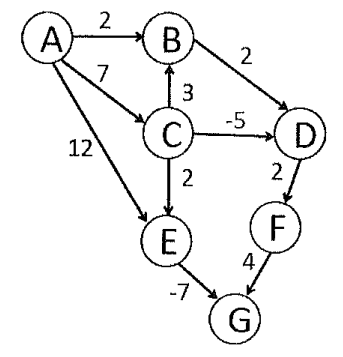

(A) `A->B->D`

(B) `A->C->D`

(C) `A->E->G->D`

(D) `A->C->E->G->D`

## 7.22. Prim's Spanning Tree Algorithm

For our last graph algorithm let's consider a problem that online game designers. The problem is that they want to efficiently transfer a piece of information to anyone and everyone who may be listening. This is important in gaming so that all the players know the very latest position of every other player!

<center><img src="imgs/bcast1.png" width="45%" /></center>

There are some brute force solutions to this problem. To begin, the broadcast host has some information that the listeners all need to receive. The simplest solution is for the broadcasting host to keep a list of all of the listeners and send individual messages to each.

In the above figure we show a small network with a broadcaster and some listeners. Using this first approach, four copies of every message would be sent. Assuming that the **least cost path** is used, let’s see how many times each router would handle the same message.

All messages from the broadcaster go through router A, so A sees all four copies of every message. Router C sees only one copy of each message for its listener. However, routers B and D would see three copies of every message since routers B and D are on the **cheapest path** for listeners 1, 2, and 4! When you consider that the broadcast host must send hundreds of messages each second for a radio broadcast, that is a lot of extra traffic.

Another brute force solution is for the broadcast host to send a single copy of the broadcast message and let the routers sort things out. In this case, the easiest solution is a strategy called <u>uncontrolled flooding</u>:

Each message starts with a time to live (`TTL`) value set to some number greater than or equal to the number of edges between the broadcast host and its most distant listener. Each router gets a copy of the message and passes the message on to all of its neighboring routers. When the message is passed on the TTL is decreased. Because each router continues to send copies of the message to all its neighbors until the TTL value reaches 0, it is easy to convince yourself that uncontrolled flooding generates many more unnecessary messages than our first strategy.

The solution to this problem lies in the construction of a minimum weight <u>spanning tree</u>. Formally we define the minimum spanning tree $T$ for a graph $G = (V,E)$ as follows. $T$ is an acyclic subset of $E$ that connects all the vertices in $V$. The sum of the weights of the edges in $T$ is minimized.

Below shows a simplified version of the broadcast graph and highlights the edges that form a minimum spanning tree for the graph. 

<center><img src="imgs/mst1.png" width="30%" /></center>

Now to solve our broadcast problem, the broadcast host simply sends a single copy of the broadcast message into the network. Each router forwards the message to any neighbor that is part of the spanning tree, excluding the neighbor that just sent it the message. 

In this example A forwards the message to B. B forwards the message to D and C. D forwards the message to E, which forwards it to F, which forwards it to G. No router sees more than one copy of any message, and all the listeners that are interested see a copy of the message.

The algorithm we will use to solve this problem is called <u>Prim's algorithm</u>. Prim's algorithm belongs to a family of algorithms called the <u>greedy algorithms</u> that applies to **undirected graph** because at each step it will choose the cheapest next step. In this case the cheapest next step is to follow the edge with the lowest weight.

```
While T is not yet a spanning tree
  Find an edge that is safe to add to the tree
  Add the new edge to T
```

The trick is in the step that directs us to "find an edge that is safe." We define a safe edge as any edge that connects a vertex that is in the spanning tree to a vertex that is not in the spanning tree. This ensures that the tree will always remain a tree and therefore have no cycles.

In [ ]:
import sys
from pythonds3.trees.priority_queue import PriorityQueue #heapq

def prim(graph, start):
    pq = PriorityQueue()
    for vertex in graph:
        vertex.distance = sys.maxsize
        vertex.previous = None
    start.distance = 0
    pq.heapify([(vertex.distance, vertex) for vertex in graph])
    while not pq.is_empty():
        print(pq)
        distance, current_v = pq.delete()
        for next_v in current_v.get_neighbors():
            new_distance = current_v.get_neighbor(next_v)
            if next_v in pq and new_distance < next_v.distance:
                next_v.previous = current_v
                next_v.distance = new_distance
                pq.change_priority(next_v, new_distance)

In [ ]:
from IPython.display import HTML, IFrame, display
iframe = f'<iframe src="https://opendsa-server.cs.vt.edu/embed/primCON" height="600" width="100%"></iframe> '
display(HTML(iframe))

The following sequence of figures shows the algorithm in operation on our sample tree. We begin with the starting vertex as A. The distances to all the other vertices are initialized to infinity. 

<center><img src="imgs/prima.png" width="25%" /></center>

<center><img src="imgs/primb.png" width="25%" /></center>

<center><img src="imgs/primc.png" width="25%" /></center>

<center><img src="imgs/primd.png" width="25%" /></center>

<center><img src="imgs/prime.png" width="25%" /></center>

<center><img src="imgs/primf.png" width="25%" /></center>

<center><img src="imgs/primg.png" width="25%" /></center>

We begin with the starting vertex as A. The distances to all the other vertices are initialized to infinity. Looking at the neighbors of A we can update distances to two of the additional vertices, B and C, because the distances to B and C through A are less than infinite.

This moves B and C to the front of the priority queue. Update the predecessor links for B and C by setting them to point to A. It is important to note that we have not formally added B or C to the spanning tree yet. **A node is not considered to be part of the spanning tree until it is removed from the priority queue**.

Since B has the smallest distance we look at B next. Examining B's neighbors we see that D and E can be updated. Both D and E get new distance values and their predecessor links are updated. Moving on to the next node in the priority queue we find C. The only node that C is adjacent to that is still in the priority queue is F; thus we can update the distance to F and adjust F’s position in the priority queue.

Now we examine the vertices adjacent to node D. We find that we can update E and reduce the distance to E from 6 to 4. When we do this we change the predecessor link on E to point back to D, thus preparing it to be grafted into the spanning tree but in a different location. The rest of the algorithm proceeds as you would expect, adding each new node to the tree.

In [ ]:
g = Graph()
g.add_edge('A', 'B', 2)
g.add_edge('B', 'A', 2)
g.add_edge('A', 'C', 3)
g.add_edge('C', 'A', 3)
g.add_edge('B', 'D', 1)
g.add_edge('D', 'B', 1)
g.add_edge('B', 'C', 1)
g.add_edge('C', 'B', 1)
g.add_edge('B', 'E', 4)
g.add_edge('E', 'B', 4)
g.add_edge('D', 'E', 1)
g.add_edge('E', 'D', 1)
g.add_edge('C', 'F', 5)
g.add_edge('F', 'C', 5)
g.add_edge('E', 'F', 1)
g.add_edge('F', 'E', 1)
g.add_edge('F', 'G', 1)
g.add_edge('G', 'F', 1)

In [ ]:
# Example of how to use the find_path function
def print_spanning_tree(graph, start_vertex):
    """Prints the edges in the minimum spanning tree."""
    print("Edges in the Minimum Spanning Tree:")
    for vertex in graph:
        if vertex.previous is not None:
            print(f"({vertex.previous.key}, {vertex.key}) \
                with weight {vertex.get_neighbor(vertex.previous)}")

            
prim(g, g.get_vertex('A'))  # Run prim from 'A'
print_spanning_tree(g, g.get_vertex('A'))

https://visualgo.net/en/mst

#### Exercise 2: Considering the following graph, when Prim's algorithm is used and starts from node F, what is the weight of the last edge to be added into the minimum spanning tree?

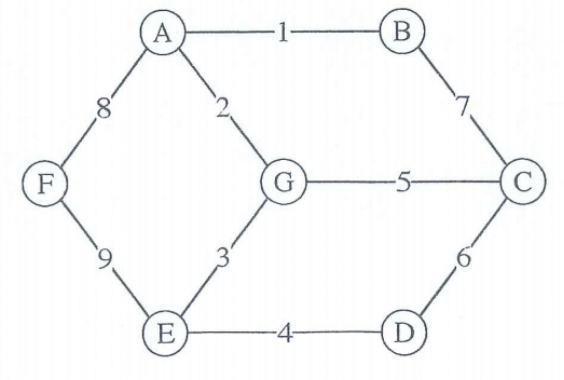

## References

1. Textbook CH7

## Key terms

1. **Graph**: A data structure composed of a set of vertices (nodes) and edges (links) that connect pairs of these vertices. It can be used to model relationships and interactions in complex systems.

2. **Vertex**: Also known as a node, it represents an entity within a graph. Vertices are the fundamental units by which graphs are formed.

3. **Edge**: A connection between two vertices in a graph. In a directed graph, edges have a direction, indicated by an arrow showing the relationship from one vertex to another.

4. **Weight**: A numerical value assigned to an edge in a graph. This value often represents cost, distance, or some other measure that impacts the traversal or analysis of the graph.

5. **Path**: A sequence of vertices connected by edges. In graphs, a path is defined by starting at one vertex and traversing through edges to reach another vertex.

6. **Cycle**: A path that begins and ends at the same vertex, with at least one edge and no repeated edges or vertices (except for the starting/ending vertex).

7. **Acyclic Graph**: A graph with no cycles. This type of graph does not allow you to return to the starting vertex by following the edges.

8. **Directed Graph**: A graph where edges have a specific direction. Each edge in a directed graph points from one vertex to another, indicating a one-way relationship.

9. **DAG (Directed Acyclic Graph)**: A directed graph that contains no cycles. This type of graph is especially useful in scenarios like task scheduling where the sequence of tasks matters and tasks do not repeat.

10. **Tree**: A type of acyclic graph where one vertex is designated as the root, and all other vertices are connected by exactly one path to the root. Trees represent hierarchical structures.

11. **Adjacency Matrix**: A square matrix used to represent a finite graph. The elements of the matrix indicate whether pairs of vertices are adjacent or not in the graph.

12. **Adjacency List**: A collection of unordered lists used to represent a graph. Each list describes the set of neighbors of a vertex in the graph.

13. **Breadth-First Search (BFS)**: An algorithm for searching a graph that starts at the root (selecting some arbitrary node as the root in the case of a graph) and explores the neighbor nodes at the present depth prior to moving on to nodes at the next depth level.

14. **Knight's Tour**: A sequence of moves of a knight on a chessboard such that the knight visits every square exactly once.

15. **Depth-First Search (DFS)**: An algorithm for traversing or searching tree or graph data structures. The algorithm starts at the root node and explores as far as possible along each branch before backtracking.

16. **Search Tree**: A tree data structure used for locating specific keys from within a set. It allows operations such as insertion, deletion, and search in efficient time.

17. **Heuristic**: A technique designed to solve a problem more quickly when classic methods are too slow, or to find an approximate solution when the exact solution is not feasible.

18. **Warnsdorff's Algorithm**: A heuristic for finding a knight's tour. The knight is moved so that it always proceeds to the square from which the knight will have the fewest onward moves.

19. **Depth-First Forest**: A collection of trees formed by performing a depth-first search on a graph, where each tree corresponds to a set of vertices explored contiguously during the search.

20. **Parenthesis Property**: In depth-first search, this property states that for any two vertices u and v, exactly one of the following three conditions holds: the intervals `[d[u], f[u]]` and `[d[v], f[v]]` are entirely disjoint; the interval `[d[u], f[u]]` is contained within the interval `[d[v], f[v]]`; or the interval `[d[v], f[v]]` is contained within the interval `[d[u], f[u]]`.

21. **Topological Sorting**: A linear ordering of the vertices of a directed graph such that for every directed edge uv from vertex u to vertex v, u comes before v in the ordering.

22. **Strongly Connected Components**: Maximal subgraphs of a directed graph such that for every pair of vertices u and v in the subgraph, there is a directed path from u to v and from v to u.

23. **Shortest Path Problems**: Problems of finding a path between two vertices in a graph such that the sum of the weights of its constituent edges is minimized.

24. **Dijkstra's Algorithm**: An algorithm for finding the shortest paths between nodes in a graph, which may represent, for example, road networks.

25. **Priority Queue**: An abstract data type similar to a regular queue or stack data structure in which each element additionally has a "priority" associated with it. Elements are served based on their priority.

26. **Uncontrolled Flooding**: A networking technique where each packet is independently sent to every outgoing link except the one it arrived on.

27. **Minimum Spanning Tree**: A subset of the edges of a connected, edge-weighted graph that connects all the vertices together, without any cycles and with the minimum possible total edge weight.

28. **Prim's Algorithm**: An algorithm that finds a minimum spanning tree for a weighted undirected graph. It finds a subset of the edges that forms a tree that includes every vertex, where the total weight of all the edges in the tree is minimized.

29. **Greedy Algorithms**: A class of algorithms that build up a solution piece by piece, always choosing the next piece that offers the most immediate benefit.